In [1]:
## Machine Learning Online Class - Exercise 1: Linear Regression
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     warmUpExercise
#     plotData
#     PART#01
#         gradientDescent
#         computeCost
#         Visualization
#         LearningRate
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s
	

#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/Machine Learning/Assignment 2/ex1data1.txt"

Mounted at /content/drive/


In [2]:
##==================== Part 1: Basic Function ====================
#Complete warmUpExercise 

# 5x5 matrix with 1's on main diagnol  

import numpy as np
def iden(a):                  
  # function definition
  # ==========YOUR CODE HERE============
  #a 2D zero matrix of given number a
  _2d_zero_matrix=np.zeros((a,a))
  for i in range(a):
    for j in range (a):
      if(i==j):
        _2d_zero_matrix[i,j]=1
  print(_2d_zero_matrix)
 # ===================================

print("Matrix a : \n")
iden(5)  # function call


Matrix a : 

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


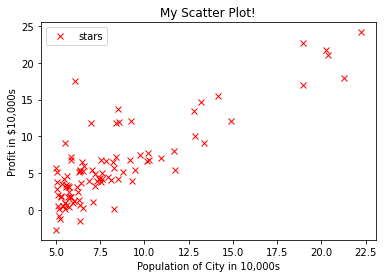

In [3]:
## ======================= Part 2: Plotting =======================

import matplotlib.pyplot as plt

# used for manipulating directory paths
import os


# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]

 
# Plot Data
# Note: You have to complete the code in plotData function

def plotdata(a,b):                       # function def
  # plotting points as a scatter plot 
  # ==========YOUR CODE HERE============
  plt.plot(a,b,"rx")
  plt.xlabel('Population of City in 10,000s') 
  plt.ylabel('Profit in $10,000s') 
  # displaying the title
  plt.title("My Scatter Plot!")
  plt.legend(['stars'])
  # ===================================
  return
 
plotdata(X,Y)  # function Call
plt.show()
#In the dataset file, The first column is the population of a city and the second column is the profit of a food truck in that city

In [4]:

m = Y.size  # number of training examples
X = np.stack([np.ones(m), X], axis=1) # it used to convert X in to (97x2), first column is all ones to get  where theta is (2x1)    "theta[0]+theta[1]*X"
print(X.shape)
# Do NOT execute this cell more than once.


(97, 2)


In [5]:

import numpy as np
from numpy import *

def computeCost(X,y , theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # ==========YOUR COST FUNCTION J HERE============
  #squared difference of estimated values and real values of y
  h_theta=h
  J_theta=sum((h_theta-y)**2)
  J_theta=J_theta/(2*m)

 # ===================================
  return J_theta

J = computeCost(X, Y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed =', J)
print('Expected cost value (approximately) 32.07\n')


With theta = [0, 0] 
Cost computed = 32.072733877455676
Expected cost value (approximately) 32.07



(2,)
[6.737190464870006, 5.9315935686049555, 5.901154707081388, 5.895228586444221, 5.8900949431173295, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806385, 5.8648268653129305, 5.859827889932181, 5.85484692057229, 5.849883892376587, 5.844938740722034, 5.840011401218361, 5.835101809707226, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.7964563822269, 5.7917036733806535, 5.7869680835173956, 5.782249550975539, 5.777548014315596, 5.772863412319381, 5.768195683989212, 5.76354476854712, 5.758910605434047, 5.754293134309077, 5.749692295048629, 5.745108027745684, 5.740540272709012, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333528, 5.713477184364749, 5.709023361800549, 5.704585581648199, 5.700163786123857, 5.695757917651815, 5.691367918863752, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506, 5.669653976714796, 5.6653

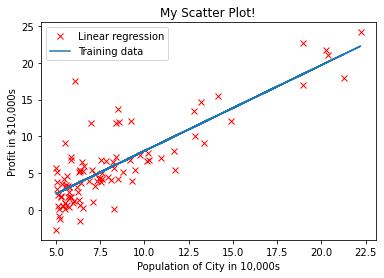

In [6]:

def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []
  for i in range(num_iters):
    # ==========YOUR GRADIENT DESCENT "theta" HERE============
    h=np.dot(X, theta)
    theta=theta-((alpha)*(1/m)*(X.T.dot(h-y)))

    # ===================================
    J_history.append(computeCost(X, y, theta))
  return theta, J_history



#=============== initialize fitting parameters
theta = np.zeros(2)
print(theta.shape)
# =================some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations) 
print(J_history)


# plot the linear fit
plotdata(X[:, 1],Y)
plt.plot(X[:, 1], np.dot(X, theta))

plt.legend([ 'Linear regression','Training data',]);



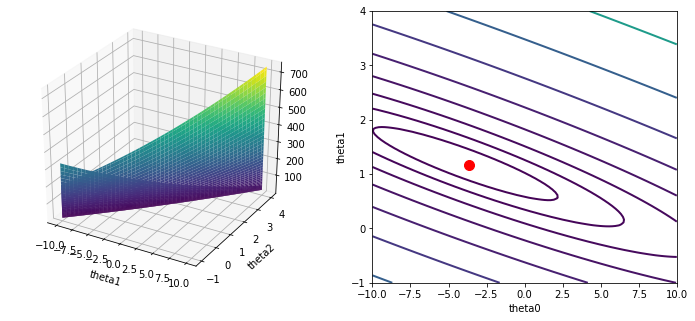

In [7]:
# ==================================NO NEED CHANGE CODE IN THIS CELL
# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# grid over which we will calculate J COST
t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((t0.shape[0], t1.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(t0):
    for j, theta1 in enumerate(t1):
        J_vals[i, j] = computeCost(X,Y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(t0, t1, J_vals, cmap='viridis')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')


# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax2 = plt.subplot(122)
ax2.contour(t0, t1, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

pass



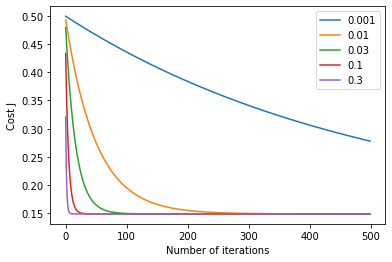

In [8]:

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]


def  featureNormalize(X): 
   
#===================YOUR CODE HERE=========
  mean=np.mean(X)
  mean_diff=X-mean
  standard_deviation=np.std(X)
  X_norm=mean_diff/standard_deviation
  mu=mean
  sigma=standard_deviation
#==========================================
  return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
Y, mu, sigma = featureNormalize(Y)

X = np.stack([np.ones(m), X], axis=1)

# CHANGE THE VALUES of ALPHAS, 5 VALUES OF ALPHA 
#PLOT LEARNING RATES FOR FOLLOWING FOR ALPHAS, NO NEED TO CHANGE THE CODE ONLY REQUIRE "gradientDescent" TO BE DEFINED CORRECTLY


# some gradient descent settings
iterations = 500
alpha = [0.001, 0.01, 0.03, 0.1, 0.3] #--------------ENTER YOUR LEARNING RATES
costs=[]

for i in range(5):
  theta = np.zeros(2) 
  theta, J_history = gradientDescent(X ,Y, theta, alpha[i], iterations)
          # initialize fitting parameters
  costs.append(J_history)
# Plot the convergence graph

for i in range(5):
  plt.plot(np.arange(len(costs[i])), costs[i], label=str(alpha[i]))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()